In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_train_trans=pd.read_csv('../input/transaction_TRAIN.csv') # (161965, 27)
df_train_op=pd.read_csv('../input/operation_TRAIN.csv') # (424481, 20)
df_train_tag=pd.read_csv('../input/tag_TRAIN.csv') # (13422, 2)

In [2]:
df_train_trans.head()

,UID,channel,day,time,trans_amt,amt_src1,merchant,code1,code2,trans_type1,...,ip1,bal,amt_src2,acc_id2,acc_id3,geo_code,trans_type2,market_code,market_type,ip1_sub
0,19092,102,30,11:48:47,1459,acdbdb842ac20f1e,abc6bc660561e0eb,NaN,NaN,26bcf43a19df14c8,...,a664530c1fb20abe,1007,9fefed0a981dcb7a,NaN,NaN,wsbq,102.0,2ecf94369847c748,1.0,45f4ca1f4e9b9cb7
1,13465,140,23,16:58:03,725,4d7831c6f695ab19,7a87b1aa20972d48,NaN,NaN,c2f2023d279665b2,...,52abe1e300a8aa10,100,NaN,NaN,NaN,wte7,105.0,NaN,NaN,2b416f1d7e89ad3b
2,13713,140,22,09:56:39,127,c5fc631370cabc0d,cfd035fc7e0a53b2,NaN,NaN,c2f2023d279665b2,...,e4c132d02ff6c095,100,NaN,NaN,NaN,ws7n,105.0,NaN,NaN,ff71a556d86c4b8f
3,22703,140,1,18:11:45,99317,a571c7fda8b7df37,c71c876b8979028e,NaN,NaN,c2f2023d279665b2,...,e1c78a56cc9dfc8b,100,fbf6bf3c8927414c,NaN,NaN,wqj6,NaN,NaN,NaN,cf1527a0b4173e8f
4,17816,140,22,13:04:02,3361,c5fc631370cabc0d,6628f5ca013e3582,NaN,NaN,c2f2023d279665b2,...,abb6b4b8f15be6d6,100,NaN,NaN,NaN,NaN,105.0,NaN,NaN,cbc62c2b1cb7deb9


## 空值统计

- 交易数据

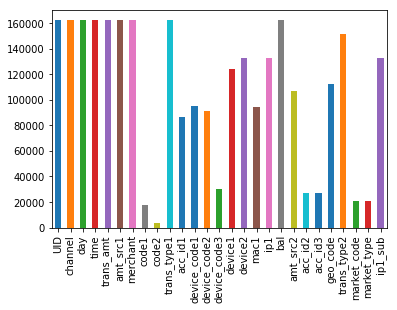

In [3]:
df_train_trans.count().plot(kind='bar')
plt.show()

In [4]:
df_train_trans.count()

UID             161965
channel         161965
day             161965
time            161965
trans_amt       161965
amt_src1        161965
merchant        161965
code1            17606
code2             3187
trans_type1     161965
acc_id1          86635
device_code1     94701
device_code2     91300
device_code3     30028
device1         123881
device2         132382
mac1             94071
ip1             132699
bal             161965
amt_src2        107170
acc_id2          26669
acc_id3          26906
geo_code        112548
trans_type2     151013
market_code      20536
market_type      20536
ip1_sub         132699
dtype: int64

- 操作数据

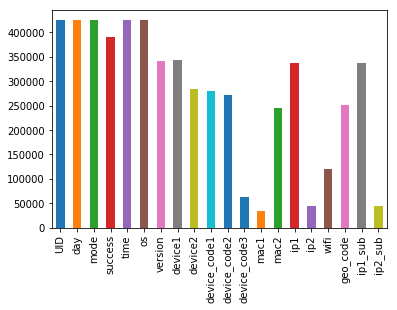

In [5]:
df_train_op.count().plot(kind='bar')
plt.show()

In [6]:
df_train_op.count()

UID             424481
day             424481
mode            424481
success         391250
time            424481
os              424481
version         342182
device1         342616
device2         283232
device_code1    279284
device_code2    271064
device_code3     62950
mac1             34400
mac2            244265
ip1             337765
ip2              44700
wifi            119665
geo_code        250435
ip1_sub         337765
ip2_sub          44700
dtype: int64

- 类别统计

0 1 数量统计

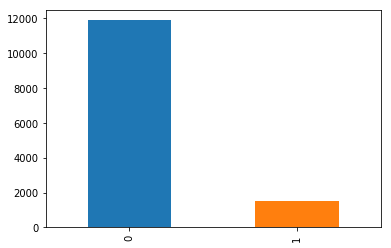

In [7]:
df_train_tag['Tag'].value_counts().plot('bar')
plt.show()

从上图可以看出，白黑用户的比例接近10:1

In [8]:
df_train_tag['Tag'].value_counts()

0    11894
1     1528
Name: Tag, dtype: int64

## 交易数据和操作数据

存在相同弄的列名，查看相同列的数据是否相同，如果相同，就去一个值

In [9]:
trans_cols=set(df_train_trans.columns)
op_cols=set(df_train_op.columns)
trans_cols.intersection(op_cols)

{'UID',
 'day',
 'device1',
 'device2',
 'device_code1',
 'device_code2',
 'device_code3',
 'geo_code',
 'ip1',
 'ip1_sub',
 'mac1',
 'time'}

In [10]:
df_train_trans['geo_code'].head()

0    wsbq
1    wte7
2    ws7n
3    wqj6
4     NaN
Name: geo_code, dtype: object

In [11]:
df_train_op['geo_code'].head()

0    wskx
1     NaN
2     NaN
3    wm4v
4     NaN
Name: geo_code, dtype: object

我们可以看出两个相同列的数据不同

## 基本统计
我们直接观察数据或者输出，我们发现操作表和交易表中的UID大多是重复的，所以不能直接将表合并作为特征，需要做统计特征或者其他手段来构建特征。

### 重命名列名，以便识别

In [12]:
df_train_trans.rename(columns=lambda col:'trans_'+col if col!='UID' else col,inplace=True)
df_train_trans.head()

,UID,trans_channel,trans_day,trans_time,trans_trans_amt,trans_amt_src1,trans_merchant,trans_code1,trans_code2,trans_trans_type1,...,trans_ip1,trans_bal,trans_amt_src2,trans_acc_id2,trans_acc_id3,trans_geo_code,trans_trans_type2,trans_market_code,trans_market_type,trans_ip1_sub
0,19092,102,30,11:48:47,1459,acdbdb842ac20f1e,abc6bc660561e0eb,NaN,NaN,26bcf43a19df14c8,...,a664530c1fb20abe,1007,9fefed0a981dcb7a,NaN,NaN,wsbq,102.0,2ecf94369847c748,1.0,45f4ca1f4e9b9cb7
1,13465,140,23,16:58:03,725,4d7831c6f695ab19,7a87b1aa20972d48,NaN,NaN,c2f2023d279665b2,...,52abe1e300a8aa10,100,NaN,NaN,NaN,wte7,105.0,NaN,NaN,2b416f1d7e89ad3b
2,13713,140,22,09:56:39,127,c5fc631370cabc0d,cfd035fc7e0a53b2,NaN,NaN,c2f2023d279665b2,...,e4c132d02ff6c095,100,NaN,NaN,NaN,ws7n,105.0,NaN,NaN,ff71a556d86c4b8f
3,22703,140,1,18:11:45,99317,a571c7fda8b7df37,c71c876b8979028e,NaN,NaN,c2f2023d279665b2,...,e1c78a56cc9dfc8b,100,fbf6bf3c8927414c,NaN,NaN,wqj6,NaN,NaN,NaN,cf1527a0b4173e8f
4,17816,140,22,13:04:02,3361,c5fc631370cabc0d,6628f5ca013e3582,NaN,NaN,c2f2023d279665b2,...,abb6b4b8f15be6d6,100,NaN,NaN,NaN,NaN,105.0,NaN,NaN,cbc62c2b1cb7deb9


In [13]:
df_train_op.rename(columns=lambda col:'op_'+col if col!='UID' else col,inplace=True)
df_train_op.head()

,UID,op_day,op_mode,op_success,op_time,op_os,op_version,op_device1,op_device2,op_device_code1,op_device_code2,op_device_code3,op_mac1,op_mac2,op_ip1,op_ip2,op_wifi,op_geo_code,op_ip1_sub,op_ip2_sub
0,10035,30,c8741ce15ceac2a4,1.0,17:51:50,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN
1,16264,16,20a91b45ef8f8221,1.0,08:36:00,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,NaN,3502c553ea2ac187
2,13162,8,b668e42707ee9c7b,0.0,18:09:57,102,7.0.5,630a1adff2a87007,MI MAX 2,1da225cb679a37eb,f18538156b8f9b57,NaN,a8dc52f65085212e,NaN,2147d925e7a8ba3c,NaN,NaN,NaN,3591678eca3f7a23,NaN
3,21392,23,c8741ce15ceac2a4,1.0,23:53:49,102,7.0.9,630a1adff2a87007,MI 5X,d0c285513b785609,a7e79e3c2c85c8c7,NaN,NaN,04a2d6c090518faa,c52efc665f0af581,NaN,4ff1553b1c96360e,wm4v,fdb5e20f6a6f2cd7,NaN
4,18599,26,acfaded7e04e7ba0,1.0,11:11:15,102,7.0.0,8399be6b80847240,NaN,27efd832595503f6,b6457e2264266257,NaN,NaN,1ab9dc3eae102aa6,0fe293bea342665a,NaN,NaN,NaN,f5009e2c6c13c80c,NaN


### UID统计

这部分主要来看看交易表和操作表的UID，是否都在标签表中的UID？如果不是，需要将那些不在标签表中存在的UID相关数据去除

In [14]:
df_trans_uids=df_train_trans['UID']
df_op_uids=df_train_op['UID']
df_tag_uids=df_train_tag['UID'] # 标签中的UID都是唯一的
print(df_trans_uids.drop_duplicates().shape,df_op_uids.drop_duplicates().shape,df_tag_uids.shape)

(13013,) (11979,) (13422,)


从上面输出，我们发现有些用户不存在交易和操作记录，有的用户存在交易记录而不存在操作记录

### “羊毛党”交易和操作统计

In [15]:
black_uids=df_train_tag[df_train_tag['Tag']==1]['UID']
len(black_uids)

1528

(1262,)
13933    1124
18105     353
20645     285
11087     254
20603     126
12671     101
16337      83
10192      83
16748      82
16916      81
Name: UID, dtype: int64


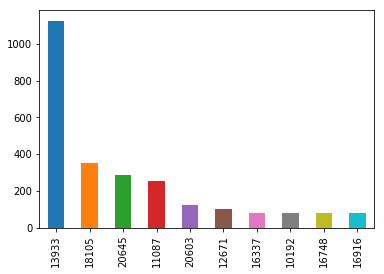

In [16]:
# “羊毛党” 交易统计
black_trans=df_train_trans[df_train_trans['UID'].isin(black_uids)]
black_trans_count=black_trans['UID'].value_counts()
print(black_trans_count.shape)
print(black_trans_count[:10])
black_trans_count[:10].plot(kind='bar')
plt.show()

我们可以看出羊毛党大部分存交易记录，羊毛党一共有1528个，剩下1528-1262=266个不存在交易记录

(1526,)
13933    1299
18105     567
18720     316
13003     266
16337     244
20410     240
18320     234
23223     231
10995     221
12403     218
Name: UID, dtype: int64


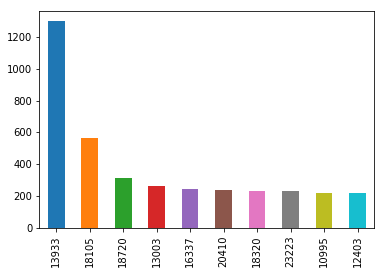

In [17]:
# “羊毛党” 操作统计
black_op=df_train_op[df_train_op['UID'].isin(black_uids)]
black_op_count=black_op['UID'].value_counts()
print(black_op_count.shape)
print(black_op_count[:10])
black_op_count[:10].plot(kind='bar')
plt.show()

我们可以看出羊毛党大部分存操作记录，羊毛党一共有1528个，仅有1528-1525=2个不存在操作记录

### “白用户”交易和操作统计
白用户即指不存在交易风险的用户

11894
(11751,)
17520    4030
21463    1126
17490     613
12340     497
13713     485
18686     407
13123     394
20480     354
22976     324
13976     315
Name: UID, dtype: int64


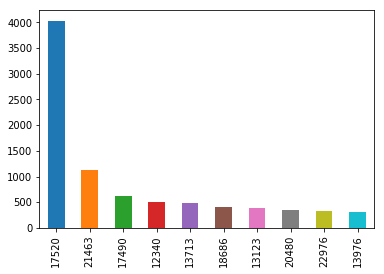

In [18]:
white_uids=df_train_tag[df_train_tag['Tag']==0]['UID']
print(len(white_uids))
# “羊毛党” 交易统计
white_trans=df_train_trans[df_train_trans['UID'].isin(white_uids)]
white_trans_count=white_trans['UID'].value_counts()
print(white_trans_count.shape)
print(white_trans_count[:10])
white_trans_count[:10].plot(kind='bar')
plt.show()

(10453,)
13976    1190
13716     950
22187     659
12353     658
20480     624
14138     614
17025     535
20212     496
17490     480
10157     473
Name: UID, dtype: int64


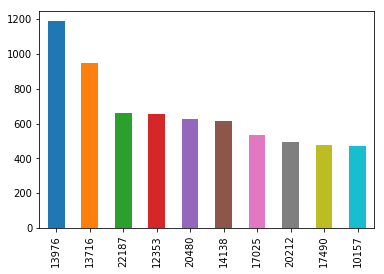

In [19]:
# “羊毛党” op统计
white_op=df_train_op[df_train_op['UID'].isin(white_uids)]
white_op_count=white_op['UID'].value_counts()
print(white_op_count.shape)
print(white_op_count[:10])
white_op_count[:10].plot(kind='bar')
plt.show()

**从羊毛党和白用户之间的交易和操作记录数量来看，羊毛党的记录要明显少于白用户的。这也符合常规，一般羊毛党注册套现之后，操作记录会减少，交易更不必说，其中羊毛党中有266个存在不交易记录也证明了这一点。那么，我们将交易和操作记录数量名别作为特征，如果不存在，记为0**

## 交易数据分析

关于羊毛党和白用户的统计

- 平台类型

In [20]:
black_trans['trans_channel'].value_counts()

102    15428
140     5698
106        2
Name: trans_channel, dtype: int64

In [21]:
white_trans['trans_channel'].value_counts()

140    78890
102    60752
119     1056
106      139
Name: trans_channel, dtype: int64

- 交易天数

In [22]:
black_trans['trans_day'].value_counts()

27    3272
26    2071
28    2025
25    1623
29    1584
30    1029
22    1027
8      963
2      903
15     796
1      754
12     662
21     516
14     412
18     384
16     349
20     337
9      309
19     292
17     245
6      243
13     222
5      213
11     188
7      184
24     156
23     149
4      115
10      68
3       37
Name: trans_day, dtype: int64

In [23]:
white_trans['trans_day'].value_counts()

22    9915
15    9649
8     9201
29    8772
1     8255
16    7550
30    7320
25    7166
9     5660
2     5532
23    4848
27    4559
28    3974
26    3873
5     3559
20    3549
17    3539
19    3452
18    3366
21    2873
24    2653
7     2561
12    2466
13    2456
6     2454
14    2448
3     2417
10    2317
11    2305
4     2148
Name: trans_day, dtype: int64

- 交易金额

In [24]:
black_trans['trans_trans_amt'].value_counts()[:20]

102      12931
2818      2415
235        384
1459       342
5536       273
3090       189
22661      184
10973      164
25380      137
105        131
113        127
50660      112
108        111
371         87
3361        87
110         81
4177        73
26739       72
3633        68
2954        64
Name: trans_trans_amt, dtype: int64

In [25]:
white_trans['trans_trans_amt'].value_counts()[:20]

2818      21866
1459      19904
5536       5727
102        4096
371        3512
643        2437
8254       2398
27282      2345
13691      2101
1730       1852
915        1778
4177       1739
136014     1645
105        1568
108        1417
127        1308
110        1194
54465      1160
113        1072
3361       1028
Name: trans_trans_amt, dtype: int64

- 交易类型

In [26]:
black_trans['trans_trans_type1'].value_counts()

6d55c54c8b1056fb    13061
c2f2023d279665b2     5683
61bfb66c928f36ac      934
ced62357ad496957      687
e0d7b8768da99dd4      461
26bcf43a19df14c8      256
9d7dd7b80e806024       23
a19e7a8951e54c06       20
d9c417304a5ae70c        2
fd4d2d1006a95637        1
Name: trans_trans_type1, dtype: int64

In [27]:
white_trans['trans_trans_type1'].value_counts()

c2f2023d279665b2    75753
6d55c54c8b1056fb    27085
26bcf43a19df14c8    11092
61bfb66c928f36ac    11052
e0d7b8768da99dd4     8090
d9c417304a5ae70c     2633
9d7dd7b80e806024     2096
a19e7a8951e54c06     1013
eb8d10591677bbe1      633
4adc3de71fe1a83c      447
85bced5214d33ad2      423
ced62357ad496957      237
e903cf2a79b83d37      161
fd4d2d1006a95637      107
3f469aa3836e71cb       15
Name: trans_trans_type1, dtype: int64

- 交易剩余余额

In [28]:
black_trans['trans_bal'].value_counts()[:20]

100    8127
211     299
208     299
206     278
214     277
219     273
216     264
222     252
200     249
203     248
197     229
244     216
225     204
195     202
227     187
241     185
246     182
233     174
230     173
192     172
Name: trans_bal, dtype: int64

In [29]:
white_trans['trans_bal'].value_counts()[:20]

100      117155
1459        150
2818        126
4177        103
344          65
5536         55
108          54
1187         41
140          36
8254         34
10973        33
371          33
116          30
13691        29
6895         28
127          28
110          27
2546         27
167          26
643          25
Name: trans_bal, dtype: int64

- 交易金源类型

In [30]:
black_trans['trans_amt_src2'].value_counts()[:20]

9fefed0a981dcb7a    11855
c4ec9622cf5c6e55     1355
cf6e3a074407c379     1241
a2aa73cdb6621133      877
9a8ee16bde15e38a      434
e98d66cbb6c099b5      366
12e06cb81b0fcf2a       69
22502c4fdab5857d       61
fbf6bf3c8927414c       57
e2a24888724d3e89       34
13292ee4e696c589       31
e7bed445b4f874ac       31
1ca672c7cb34af43       30
7bbedaeb92ef822e       30
e86309711bd84312       19
6d62c8c3c4f9cc5f       10
021826a651647c36       10
dea7e09a621abba3        7
01d2df370ace8ce4        7
00aba2124ca7287b        6
Name: trans_amt_src2, dtype: int64

In [31]:
white_trans['trans_amt_src2'].value_counts()[:20]

9fefed0a981dcb7a    21187
cf6e3a074407c379    17744
9a8ee16bde15e38a    14650
a2aa73cdb6621133     8318
1ca672c7cb34af43     3419
e98d66cbb6c099b5     2965
e2a24888724d3e89     2753
12e06cb81b0fcf2a     2584
8f7eb30a47b8af8c     2148
e7bed445b4f874ac     2145
8d2ff85b6fd5dc78     1895
d46a2a9577fb52c3     1258
7bbedaeb92ef822e     1058
4a4fdbd7ae5655cd      993
fbf6bf3c8927414c      711
c4ec9622cf5c6e55      705
58d462f1d9cb53db      550
6ff95b0f27cad429      447
00aba2124ca7287b      443
021826a651647c36      408
Name: trans_amt_src2, dtype: int64

- 交易类型2

In [32]:
black_trans['trans_trans_type2'].value_counts()

102.0    9799
104.0    6198
105.0    4805
103.0      44
Name: trans_trans_type2, dtype: int64

In [33]:
white_trans['trans_trans_type2'].value_counts()

105.0    63437
102.0    52150
104.0    11748
103.0     2832
Name: trans_trans_type2, dtype: int64

- 地理位置

In [34]:
black_trans['trans_geo_code'].value_counts()[:20]

w7w3    1123
webw     324
wtq3     277
weby     209
wtw4     157
ws0e     109
ws07     109
wtvk      85
wtcx      61
ww5h      58
wk3n      57
ws0s      47
ws4u      44
wwcu      42
ws19      38
wqj6      38
wtvm      37
wqj7      37
wt7j      31
ww5b      30
Name: trans_geo_code, dtype: int64

In [35]:
white_trans['trans_geo_code'].value_counts()[:20]

wsbq    1101
ws0e     997
ws06     888
wme1     788
wmr8     553
wxrt     551
ws7n     549
wsb1     543
wss8     543
wm4x     538
wmd6     531
wm4u     523
wxrv     493
wts4     468
wtsk     468
tzy4     439
wme9     422
wt02     419
ws4y     408
wt59     403
Name: trans_geo_code, dtype: int64

## 操作数据统计

- 操作类型

In [36]:
black_op['op_mode'].value_counts()[:20]

acfaded7e04e7ba0    15773
79f8b86938180c3c    14960
d25caee90b27fa9b    12220
c8741ce15ceac2a4    11672
963bd8a75ff9ab37     1157
b501fa4fc58206b9     1028
072eee5c88d380df      836
2f3e878175e34d9c      774
3b02bcd4b685d7a8      546
00094ae2a1d62504      543
20a91b45ef8f8221      538
bf79b3647c0878eb      478
1c341176507fbd9b      458
479617cd802ed152      379
270ca3ca8f0d1126      290
a698c1862f390021      249
08017d2cb28c2348      233
ac63e881c4e19402      164
8c7ce5ff939e66d1      133
e1d2fad8ffdc66b3      128
Name: op_mode, dtype: int64

In [37]:
white_op['op_mode'].value_counts()[:20]

c8741ce15ceac2a4    209604
d25caee90b27fa9b     40141
79f8b86938180c3c     13600
b501fa4fc58206b9     12098
acfaded7e04e7ba0      9215
3b02bcd4b685d7a8      7284
00094ae2a1d62504      6973
072eee5c88d380df      6899
20a91b45ef8f8221      6177
cd75f033b0488ace      5844
e1d2fad8ffdc66b3      4536
963bd8a75ff9ab37      4279
2f3e878175e34d9c      3750
cca82161b59127c1      3607
6b2aa6745680f08a      3387
1c341176507fbd9b      2770
d21cae2b73884a8d      2534
479617cd802ed152      2329
bf79b3647c0878eb      1932
08017d2cb28c2348      1161
Name: op_mode, dtype: int64

- 操作状态

In [38]:
black_op['op_success'].value_counts()

1.0    46991
0.0     1436
Name: op_success, dtype: int64

In [39]:
white_op['op_success'].value_counts()

1.0    326884
0.0     15939
Name: op_success, dtype: int64

- 操作系统

In [40]:
black_op['op_os'].value_counts()

102    30253
200    17643
103    15189
101      380
104       52
105        2
107        1
Name: op_os, dtype: int64

In [41]:
white_op['op_os'].value_counts()

102    249887
200     61178
103     47564
101      1688
104       348
107       296
Name: op_os, dtype: int64

## 特征工程

### 交易和操作数量

In [42]:
trans_cnt_dict=dict(df_trans_uids.value_counts())
trans_cnt=[trans_cnt_dict[uid] if uid in trans_cnt_dict else 0 for uid in df_tag_uids ]
df_train_tag['trans_cnt']=trans_cnt

In [43]:
op_cnt_dict=dict(df_op_uids.value_counts())
op_cnt=[op_cnt_dict[uid] if uid in op_cnt_dict else 0 for uid in df_tag_uids ]
df_train_tag['op_cnt']=op_cnt

In [46]:
df_train_tag.head()

,UID,Tag,trans_cnt,op_cnt
0,10000,1,2,9
1,10001,0,18,67
2,10002,0,3,11
3,10003,0,4,15
4,10004,0,7,34
